We will start by implementing the experiments conducted by Albert, Jeong, and Barabasi.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd

### Creating an ER Random Graph and a WS Small World Graph

In [2]:
n = 10000
m = 20000
k = 4
# p_ER = 0.01
p_WS = 0.2

# ER = nx.erdos_renyi_graph(n, p_ER)
ER = nx.gnm_random_graph(n, m)
WS = nx.watts_strogatz_graph(n, k, p_WS)

### Reading in the Electrical Grid Graph and Using that

In [3]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [4]:
electrical_grid = read_graph('opsahl-powergrid/out.opsahl-powergrid')

### Implementing a Random Attack

In [5]:
import random
def flip(p):
    """Returns True with probability `p`."""
    return np.random.random() < p

# def random_attack(G, p):
#     """Returns a graph with nodes removed at probability p"""
#     H = G.copy()
#     for i in list(H.nodes()):
#         if flip(p):
#             H.remove_node(i)
#     return H

def random_attack(G, k):
    """Returns a graph with percent f nodes removed at random"""
    nodes_removed = random.sample(list(G.nodes),k=k)
    G.remove_nodes_from(nodes_removed)

def sample_path_lengths(G, nodes=None, trials=1000):
    """Choose random pairs of nodes and compute the path length between them.

    G: Graph
    nodes: list of nodes to choose from
    trials: number of pairs to choose

    returns: list of path lengths
    """
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
    
        
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = []
    for pair in pairs:
        try:
            path = nx.shortest_path_length(G, *pair)
            lengths.append(path)
        except:
            pass
    return lengths

def average_shortest_length(G):
    return np.mean(sample_path_lengths(G))

def get_clusters(G):
    
    clusters = []
    queue = list(G.nodes())
    while queue:
        i = queue.pop()
        connected_nodes = nx.node_connected_component(G, i)
        for x in connected_nodes:
            if x in queue:
                queue.remove(x)
        clusters.append(len(connected_nodes))
    
    return clusters

def clusters(G):
    cluster_list = get_clusters(G)
    max_val = max(cluster_list)
    isolated = cluster_list.copy()
    isolated.remove(max_val)
    if not isolated:
        isolated = [1]
    return max_val / len(G.nodes()), np.mean(isolated)


### Testing

average shortest length:  2.411
cluster sizes:  [100]
largest relative cluster:  1.0
average cluster size:  1.0
number of nodes:  100


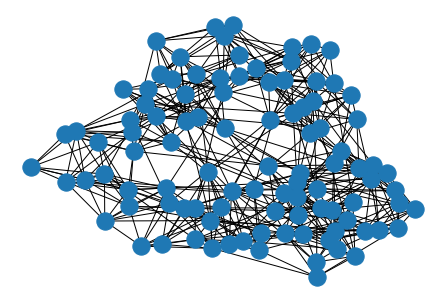

In [6]:
WS = nx.watts_strogatz_graph(100, 10, p_WS)
nx.draw(WS)
largest_cluster, avg_cluster = clusters(WS)

print("average shortest length: ", average_shortest_length(WS))
print("cluster sizes: ", get_clusters(WS))
print("largest relative cluster: ", largest_cluster)
print("average cluster size: ", avg_cluster)
print("number of nodes: ", len(WS.nodes()))

average shortest length:  2.512
cluster sizes:  [90]
largest relative cluster:  1.0
average cluster size:  1.0
number of nodes:  90


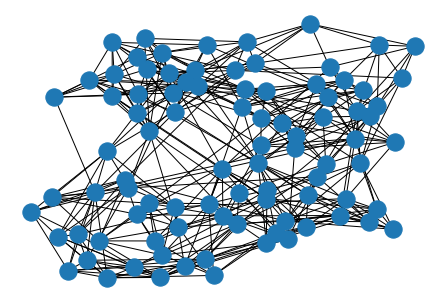

In [7]:
random_attack(WS, 10)
nx.draw(WS)
largest_cluster, avg_cluster = clusters(WS)

print("average shortest length: ", average_shortest_length(WS))
print("cluster sizes: ", get_clusters(WS))
print("largest relative cluster: ", largest_cluster)
print("average cluster size: ", avg_cluster)
print("number of nodes: ", len(WS.nodes()))

### Replicating Largest Cluster Graph

In [26]:
n = 1000
m = 2000
k = 7
# p_ER = 0.01
p_WS = 0.01
step=.01
size = int(.8/step)
fr = np.linspace(1,size,size)*step

In [27]:
import time
er_max = []
er_avg = []
ws_max = []
ws_avg = []


ER = nx.gnm_random_graph(n, m)
WS = nx.watts_strogatz_graph(n, k, p_WS)

t0 = time.time()
for i in fr:
    #remove nodes
    random_attack(ER, int(step*n))
    random_attack(WS, int(step*n))
    
    #calculate cluster properties
    erl, era = clusters(ER)
    wsl, wsa = clusters(WS)
    
    
    #add cluster properties
    er_max.append(erl)
    er_avg.append(era)
    ws_max.append(wsl)
    ws_avg.append(wsa)
print("time: ", time.time() - t0)

time:  0.30503249168395996


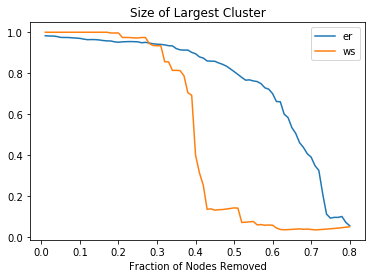

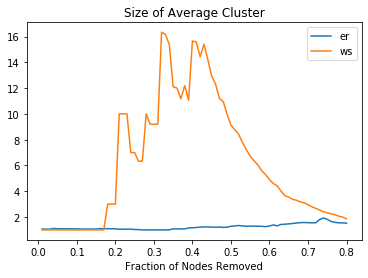

In [28]:
plt.plot(fr, er_max)
plt.plot(fr, ws_max)
plt.legend(['er', 'ws'])
plt.xlabel("Fraction of Nodes Removed")
plt.title("Size of Largest Cluster")
plt.show()

plt.figure()
plt.plot(fr, er_avg)
plt.plot(fr, ws_avg)
plt.legend(['er', 'ws'])
plt.xlabel("Fraction of Nodes Removed")
plt.title("Size of Average Cluster")
plt.show()

In [ ]:
import time
max_frac = 0.8
frac = 0
fr = []
er_max = []
er_avg = []
ws_max = []
ws_avg = []


ER = nx.gnm_random_graph(n, m)
WS = nx.watts_strogatz_graph(n, k, p_WS)
print(ER, WS)

t0 = time.time()
while frac <= max_frac:
    #remove nodes
    target_node_attack(ER)
    target_node_attack(WS)
    
    #calculate cluster properties
    erl, era = clusters(ER)
    wsl, wsa = clusters(WS)
    
    
    #add cluster properties
    frac = (n-len(ER.nodes())) / n
    fr.append(frac)
    er_max.append(erl)
    er_avg.append(era)
    ws_max.append(wsl)
    ws_avg.append(wsa)
print("time: ", time.time() - t0)